In [8]:
import qiskit as q 
from qiskit.visualization import plot_histogram, plot_bloch_multivector 
from matplotlib import style 
import math 

%matplotlib inline

statevec_sim = q.Aer.get_backend("statevector_simulator")
qasm_sim = q.Aer.get_backend("qasm_simulator") #change this to run on quantum computer if you want



## Uncertain Qubits 


In [6]:
c = q.QuantumCircuit(2,2)
c.ry(math.pi/4, 0)
c.ry(math.pi/4, 1)

orig_statevec = q.execute(c, backend=statevec_sim).result().get_statevector()

c.measure([0,1],[0,1])
c.draw() 




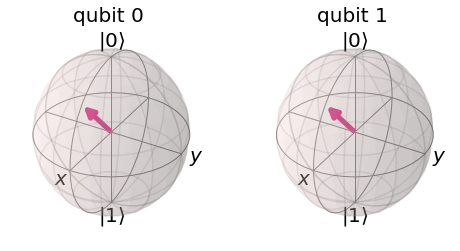

In [7]:
plot_bloch_multivector(orig_statevec)


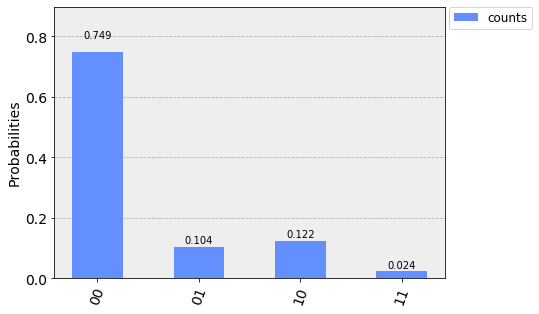

In [10]:

orig_counts = q.execute(c, backend = qasm_sim, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=["counts"])


## Uncertain Qubits, Hadamard at front 

In [18]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.ry(math.pi/4, 0)
c.ry(math.pi/4, 1)

statevec = q.execute(c, backend=statevec_sim).result().get_statevector()

c.measure([0,1],[0,1])

c.draw() 

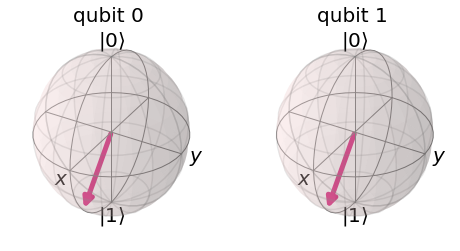

In [19]:
plot_bloch_multivector(statevec)



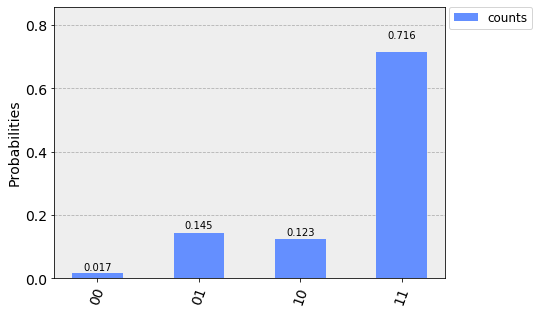

In [21]:
counts = q.execute(c, backend = qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=["counts"])

# # Hadamard Sandwich on Uncertain Qubits 

In [22]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.ry(math.pi/4, 0)
c.ry(math.pi/4, 1)
c.h(0)
c.h(1)

statevec = q.execute(c, backend=statevec_sim).result().get_statevector()

c.measure([0,1],[0,1])

c.draw() 

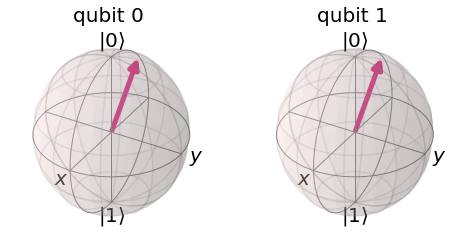

In [23]:
plot_bloch_multivector(statevec)


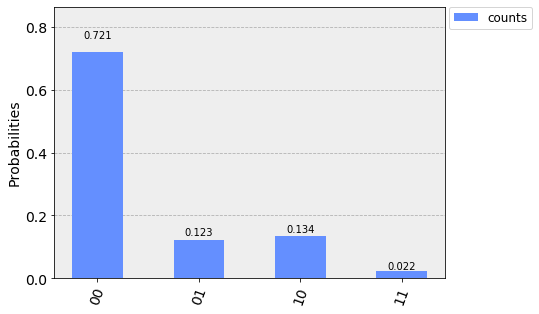

In [24]:
counts = q.execute(c, backend = qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=["counts"])

## Certain Qubits

In [25]:
c = q.QuantumCircuit(2,2)
c.x(0)
c.x(1)

orig_statevec = q.execute(c, backend = statevec_sim).result().get_statevector()
c.measure ([0,1],[0,1])
c.draw() 



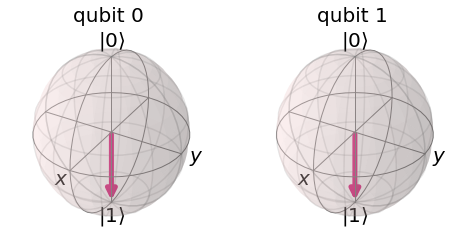

In [27]:
plot_bloch_multivector(orig_statevec)


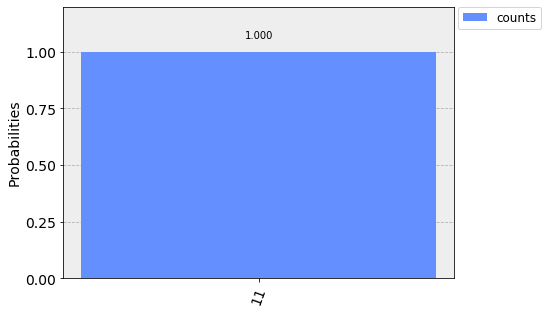

In [28]:
orig_counts = q.execute(c, backend = qasm_sim, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=["counts"])

## Hadamard in front of certain qubits 

In [38]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.x(0)
c.x(1)

statevec = q.execute(c, backend = statevec_sim).result().get_statevector()
c.measure ([0,1],[0,1])
c.draw() 


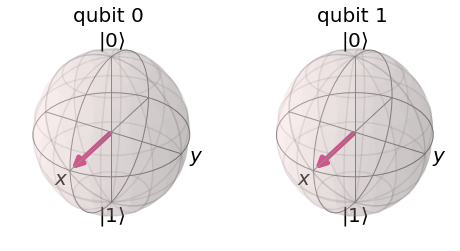

In [39]:
plot_bloch_multivector(statevec)


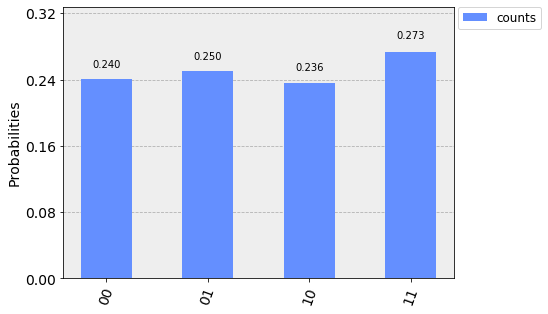

In [46]:
counts = q.execute(c, backend = qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=["counts"])

## Hadamard Sandwich Certain Qubits

In [47]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.x(0)
c.x(1)
c.h(0)
c.h(1)

statevec = q.execute(c, backend = statevec_sim).result().get_statevector()
c.measure ([0,1],[0,1])
c.draw() 

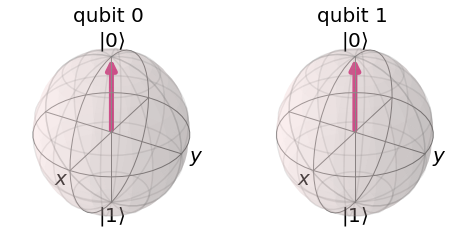

In [48]:
plot_bloch_multivector(statevec)


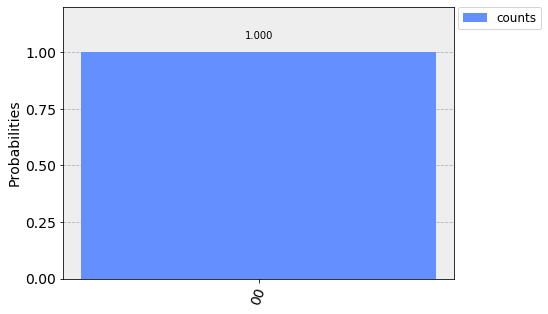

In [49]:
counts = q.execute(c, backend = qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=["counts"])

In [50]:
def balanced_black_box(c): 
    c.cx(0,2)
    c.cx(1,2)
    return c

def constant_black_box(c): 
    return c 
    
    
    

In [51]:
c = q.QuantumCircuit(3,2)
c = balanced_black_box(c) 
c.draw() 

In [52]:
c = q.QuantumCircuit(3,2)
c.h(0)
c.h(1)
c.h(2)
c = balanced_black_box(c) 
c.h(0)
c.h(1)
#c.h(2)
c.draw() 

In [58]:
c = q.QuantumCircuit(3,2)
c.x(2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = balanced_black_box(c) 
c.barrier() 
c.h(0)
c.h(1)
#c.h(2)
c.measure([0,1],[0,1])
c.draw() 

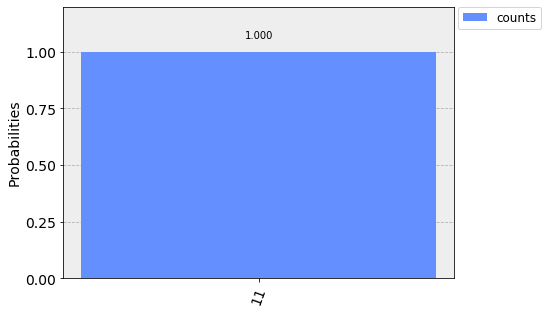

In [59]:
counts = q.execute(c, backend = qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=["counts"])

In [ ]:
# adding a not gate in front of hadamard flips the vector 

In [60]:
c = q.QuantumCircuit(3,2)
c.x(2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = constant_black_box(c) 
c.barrier() 
c.h(0)
c.h(1)
#c.h(2)
c.measure([0,1],[0,1])
c.draw() 

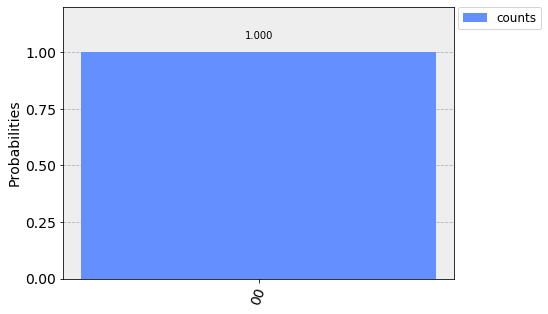

In [61]:
counts = q.execute(c, backend = qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=["counts"])

In [62]:
#so much more information than 0 and 1 in the algorithm and we factor that into it when we use qubits 

In [63]:
c = q.QuantumCircuit(1,1)
c.x(0)
c.h(0)
c.draw()


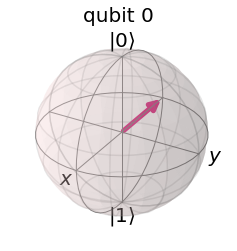

In [65]:
statevec = q.execute(c, backend = statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec)


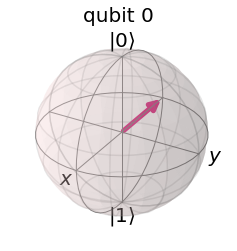

In [68]:
c = q.QuantumCircuit(1,1)
c.h(0)
c.ry(math.pi,0)
statevec = q.execute(c, backend = statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec)

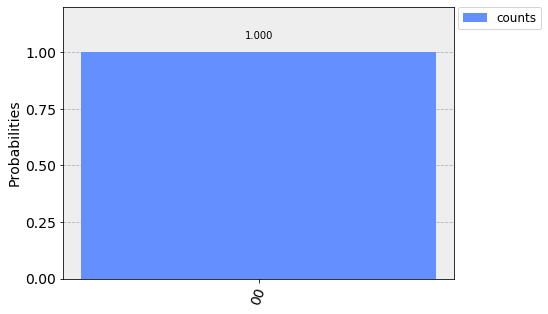

In [73]:
c = q.QuantumCircuit(3,2)
#c.ry(math.pi, 2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.ry(math.pi, 2)
c.barrier()
c = constant_black_box(c) 
c.barrier() 
c.h(0)
c.h(1)
#c.h(2)
c.measure([0,1],[0,1])
c.draw() 

counts = q.execute(c, backend = qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=["counts"])

In [ ]:
#the not gate does not work after the hadamard as it is a rotation along the x axis but its perfectly 
